In [39]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
import tensorflow as tf

In [40]:
#loading dataset
train_ds = pd.read_csv('Sentiment Analysis Dataset/train.csv',encoding='latin1')
validation_ds = pd.read_csv('Sentiment Analysis Dataset/test.csv',encoding='latin1')

train_ds = train_ds[['text','sentiment']]
validation_ds = validation_ds[['text','sentiment']]

In [41]:
#removing NULL
train_ds['text'].fillna('',inplace=True)
validation_ds['text'].fillna('',inplace=True)

In [42]:
#Turning 'positive' and 'negative' into numeric
def func(sentiment):
    if sentiment =='positive':
        return 0
    elif sentiment =='negative':
        return 1
    else:
        return 2
train_ds['sentiment'] = train_ds['sentiment'].apply(func)
validation_ds['sentiment'] = validation_ds['sentiment'].apply(func)

In [43]:
x_train = np.array(train_ds['text'].tolist())
y_train = np.array(train_ds['sentiment'].tolist())
x_test = np.array(validation_ds['text'].tolist())
y_test = np.array(validation_ds['sentiment'].tolist())

In [44]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [45]:
#tokenizing the text
tokenizer = Tokenizer(num_words=20000)

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [82]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [47]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen=35) 
x_test = pad_sequences(x_test, padding='post', maxlen=35)  

In [48]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [49]:
x_train.shape

(27481, 35)

In [50]:
#LSTM model
LSTMmodel = Sequential()
LSTMmodel.add(Embedding(input_dim=20000, output_dim=128, input_length=35))
LSTMmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
LSTMmodel.add(Dense(3, activation='softmax'))

c:\Users\kaira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:
LSTMmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTMmodel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Training
history = LSTMmodel.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


859/859 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4442 - loss: 1.0450 - val_accuracy: 0.3483 - val_loss: 0.9911
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.4997 - loss: 0.9630 - val_accuracy: 0.6833 - val_loss: 0.7623
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.6601 - loss: 0.7587 - val_accuracy: 0.7907 - val_loss: 0.5753
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.7901 - loss: 0.5409 - val_accuracy: 0.7940 - val_loss: 0.5681
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8449 - loss: 0.4191 - val_accuracy: 0.7931 - val_loss: 0.5536
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8803 - loss: 0.3359 - val_accuracy: 0.7917 - val_loss: 0.5935
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9128 - loss: 0.2632 - val_accuracy: 0.7857 - val_loss: 0.6450
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9276 - loss: 0.2172 - val_accurac

In [54]:
LSTM_history = history

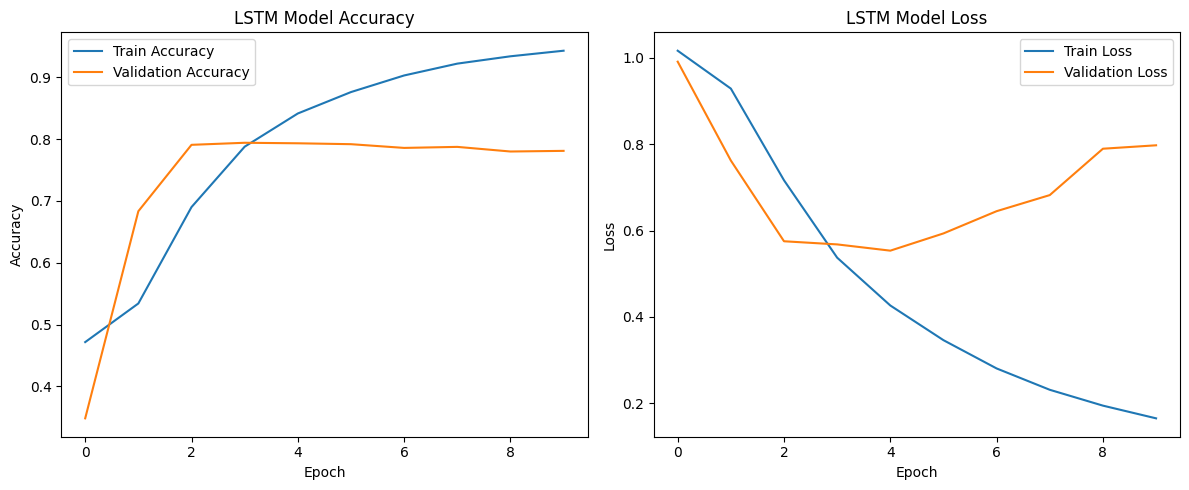

In [55]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
def predict(text):
    new_text_seq = tokenizer.texts_to_sequences([text])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)
    predictions = LSTMmodel.predict(new_text_padded)
    predicted_class_index = predictions.argmax(axis=-1)
    if predicted_class_index[0] == 0:
        return "Positive Sentiment"
    elif predicted_class_index[0] == 1:
        return "Negative Sentiment"
    else:
        return "Neutral Sentiment"

In [68]:
# Test predictions
print(predict("The movie was so bad and horrible")) 
print(predict("This is really great!"))    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Negative Sentiment
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Positive Sentiment


### GRU Model


In [69]:
from tensorflow.keras.layers import Dense, GRU, Embedding

In [70]:
# Build GRU model
GRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=35),
    GRU(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

c:\Users\kaira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# compiling
GRUmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [74]:
# Training
history = GRUmodel.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10


430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.3997 - loss: 1.0897 - val_accuracy: 0.5630 - val_loss: 1.0331
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.4036 - loss: 1.0948 - val_accuracy: 0.5643 - val_loss: 1.0139
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.5889 - loss: 0.8611 - val_accuracy: 0.5630 - val_loss: 0.9893
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7633 - loss: 0.6081 - val_accuracy: 0.5630 - val_loss: 0.9904
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.8279 - loss: 0.4719 - val_accuracy: 0.5630 - val_loss: 0.9858
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8666 - loss: 0.3776 - val_accuracy: 0.5630 - val_loss: 0.9935
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.8902 - loss: 0.3150 - val_accuracy: 0.5630 - val_loss: 0.9854
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9086 - loss: 0.2623 - val_accurac

In [75]:
GRU_history = history

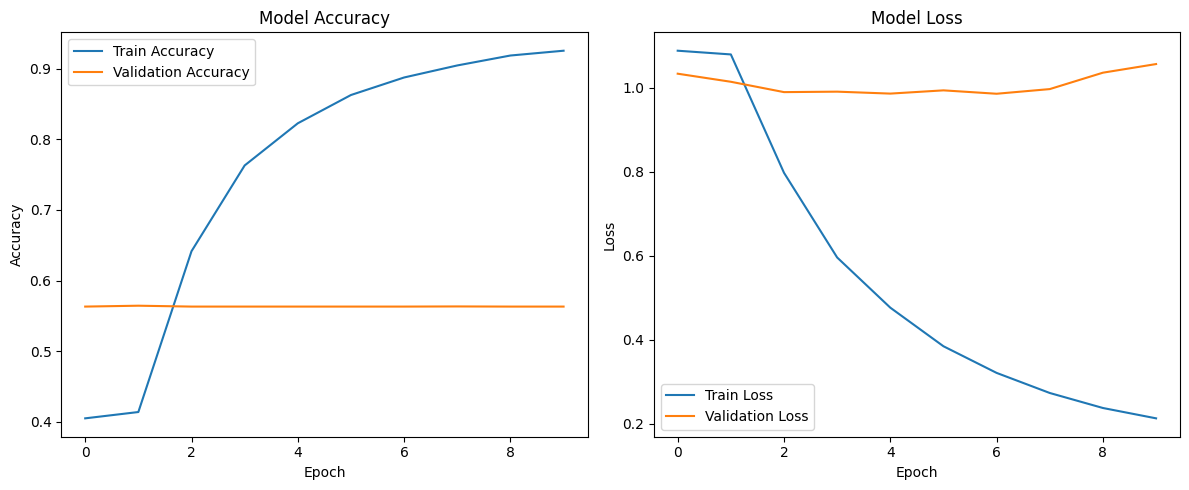

In [76]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
def predict(text):
    new_text_seq = tokenizer.texts_to_sequences([text])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)
    predictions = GRUmodel.predict(new_text_padded)
    predicted_class_index = predictions.argmax(axis=-1)
    if predicted_class_index[0] == 0:
        return "Positive Sentiment"
    elif predicted_class_index[0] == 1:
        return "Negative Sentiment"
    else:
        return "Neutral Sentiment"

In [97]:
# Test predictions
print(predict("The movie was so bad and horrible")) 
print(predict("This is really great!"))    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Negative Sentiment
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Positive Sentiment


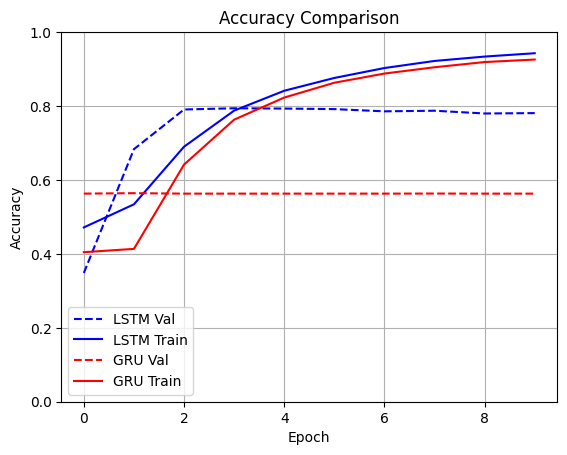

In [79]:
plt.plot(LSTM_history.history['val_accuracy'], linestyle='--', color='blue', label='LSTM Val')
plt.plot(LSTM_history.history['accuracy'], color='blue', label='LSTM Train')
plt.plot(GRU_history.history['val_accuracy'], linestyle='--', color='red', label='GRU Val')
plt.plot(GRU_history.history['accuracy'], color='red', label='GRU Train')

plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend()
plt.grid(True)

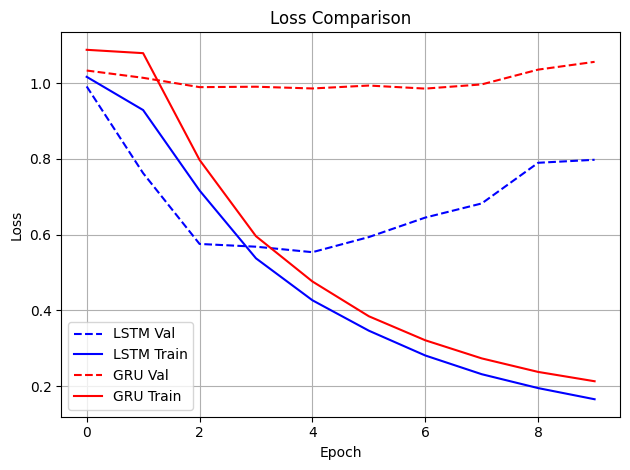

In [81]:
plt.plot(LSTM_history.history['val_loss'], linestyle='--', color='blue', label='LSTM Val')
plt.plot(LSTM_history.history['loss'], color='blue', label='LSTM Train')
plt.plot(GRU_history.history['val_loss'], linestyle='--', color='red', label='GRU Val')
plt.plot(GRU_history.history['loss'], color='red', label='GRU Train')

plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### BI-LSTM model

In [84]:
from tensorflow.keras.layers import Bidirectional

#LSTM model
BILSTMmodel = Sequential()
BILSTMmodel.add(Embedding(input_dim=20000, output_dim=128, input_length=35))
BILSTMmodel.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
BILSTMmodel.add(Dense(64, activation='relu'))
BILSTMmodel.add(Dense(3, activation='softmax'))

In [85]:
BILSTMmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [86]:
BILSTMmodel.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
history = BILSTMmodel.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10


430/430 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.5405 - loss: 0.9289 - val_accuracy: 0.7938 - val_loss: 0.5313
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.7759 - loss: 0.5646 - val_accuracy: 0.8048 - val_loss: 0.4918
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.8398 - loss: 0.4244 - val_accuracy: 0.7990 - val_loss: 0.5167
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.8699 - loss: 0.3543 - val_accuracy: 0.7994 - val_loss: 0.5430
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.8970 - loss: 0.2855 - val_accuracy: 0.7944 - val_loss: 0.6293
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9116 - loss: 0.2464 - val_accuracy: 0.7838 - val_loss: 0.6878
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9307 - loss: 0.2006 - val_accuracy: 0.7778 - val_loss: 0.7739
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9399 - loss: 0.1729 - val_accurac

In [90]:
bi_history = history

In [91]:
def predict(text):
    new_text_seq = tokenizer.texts_to_sequences([text])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)
    predictions = BILSTMmodel.predict(new_text_padded)
    predicted_class_index = predictions.argmax(axis=-1)
    if predicted_class_index[0] == 0:
        return "Positive Sentiment"
    elif predicted_class_index[0] == 1:
        return "Negative Sentiment"
    else:
        return "Neutral Sentiment"

In [92]:
# Test predictions
print(predict("The movie was so bad and horrible")) 
print(predict("This is really great!"))    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Negative Sentiment
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Positive Sentiment


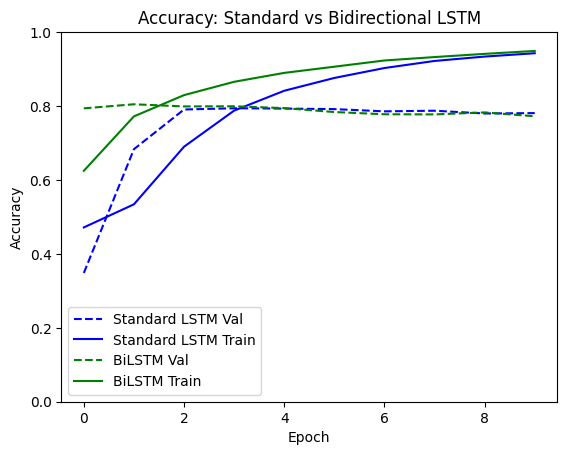

In [95]:
plt.plot(LSTM_history.history['val_accuracy'], linestyle='--', color='blue', label='Standard LSTM Val')
plt.plot(LSTM_history.history['accuracy'], color='blue', label='Standard LSTM Train')
plt.plot(bi_history.history['val_accuracy'], linestyle='--', color='green', label='BiLSTM Val')
plt.plot(bi_history.history['accuracy'], color='green', label='BiLSTM Train')

plt.title('Accuracy: Standard vs Bidirectional LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend()
plt.show()

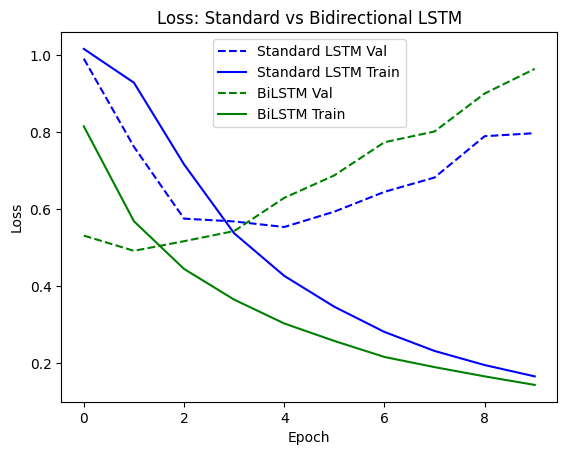

In [96]:
plt.plot(LSTM_history.history['val_loss'], linestyle='--', color='blue', label='Standard LSTM Val')
plt.plot(LSTM_history.history['loss'], color='blue', label='Standard LSTM Train')
plt.plot(bi_history.history['val_loss'], linestyle='--', color='green', label='BiLSTM Val')
plt.plot(bi_history.history['loss'], color='green', label='BiLSTM Train')

plt.title('Loss: Standard vs Bidirectional LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()